In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
from decimal import Decimal as D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth
from sklearn import preprocessing, cross_validation
from sklearn.decomposition import PCA as sklearnPCA
from pandas.tools.plotting import parallel_coordinates
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [32]:
df = pd.read_csv('FRIENDSS07E01.mkv.embedding.txt', header = None, sep=" ")

print(len(df.columns))

colnames = ['timestamp', 'faceID']
for i in range(0,len(df.columns)-2):
    colnames.append(i)
df.columns = colnames
# print(df.head())

Xdf = df.drop(['timestamp','faceID'], axis = 1)
# print(Xdf.head())


130


In [33]:
X = []
for i in range(0,len(Xdf.index)):
    X.append(np.array(Xdf.iloc[i]))
X = np.array(X)
print(X)
# X = preprocessing.scale(X) #comment this if preprocessing after fitting

[[ 0.04942  0.15537  0.10378 ..., -0.04487  0.03427  0.00092]
 [ 0.01851  0.15563  0.09439 ..., -0.03154  0.04304  0.01308]
 [ 0.01082  0.15771  0.097   ..., -0.05127  0.0453   0.0249 ]
 ..., 
 [-0.08009  0.18752  0.08897 ..., -0.11762  0.0632   0.10109]
 [-0.03158  0.11401  0.05489 ..., -0.09667 -0.01233 -0.00733]
 [-0.08275  0.17119  0.09274 ..., -0.11022  0.05484  0.08971]]


In [34]:
# quantile =[]
# score =np.array([])
# i=D("0.01");j=0
# while i <= 0.5:
#     quantile.append(i) 
#     i= i + D("0.01"); j+=1
# print(quantile)
# j = 0
# score = pd.DataFrame()
# for q in quantile:
#     bandwidth = estimate_bandwidth(X, quantile=q)
#     if bandwidth!=0:
#         clf = MeanShift(bandwidth = bandwidth)
#         clf.fit(X)
#         L = clf.labels_
#         if int(L.shape[0]) >= 2:
#             score[j][0]= metrics.silhouette_score(X, L, metric='euclidean')
#             score[j][1]= q
#             j+=1
# print(score)
    
# labels = clf.labels_
# print(labels)
# centers = clf.cluster_centers_
# # print(centers)
# # print(clf.get_params)
# print(metrics.silhouette_score(X, labels, metric='euclidean'))

In [134]:
bandwidth = estimate_bandwidth(X, quantile=0.1)
clf = MeanShift(bandwidth = bandwidth)
clf.fit(X)
L = clf.labels_
score = metrics.silhouette_score(X, L, metric='euclidean')
print(score)
labels = clf.labels_
print(labels)
centers = clf.cluster_centers_

0.263933243832
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 0 0 2 0 2 0 2 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 3 1]


In [135]:
#2-dimensional PCA
pca = sklearnPCA(n_components=2)

# if preprocessing done after use this:
X = preprocessing.scale(X)
centers = preprocessing.scale(centers) 
X_2d = pd.DataFrame(pca.fit_transform(X))
X_2d['labels']=labels.tolist()
print(X_2d.head())

cent_2d_pca =pd.DataFrame(pca.fit_transform(centers))
print(cent_2d_pca.head())

          0         1  labels
0 -4.917069 -2.791290       0
1 -4.564061 -3.017039       0
2 -4.303305 -3.420827       0
3 -3.662005 -2.808516       0
4 -4.185060 -2.597376       0
          0         1
0  9.554895 -7.544542
1 -8.241287 -1.160618
2 -9.054932  0.289775
3  7.741324  8.415385


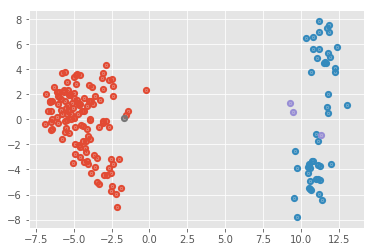

In [136]:
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111, projection='3d')
colors = 100*['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8']

for label in set(labels):
#     print label
    color = colors[label]
#     print (color)
    for i in range(0,len(X_2d.index)):
        if (X_2d.iloc[i][2] == label):
            plt.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1], marker="o", color=color, s=5, linewidths=5)
#             ax1.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1],X_2d.iloc[i][2], marker="o", color=color, s=10, linewidths=5)

plt.legend()
plt.show()

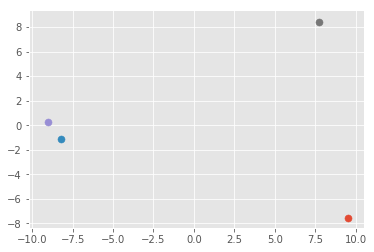

In [137]:
for i in cent_2d_pca.index:
    plt.scatter(cent_2d_pca.iloc[i][0],cent_2d_pca.iloc[i][1],s = 50)
    
plt.show()